In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pf= pd.read_csv("C:/Users/Xun/Downloads/air-quality-data.csv")
pf

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78
...,...,...
31856,31-12-2021 19:00,72.25
31857,31-12-2021 20:00,71.56
31858,31-12-2021 21:00,70.27
31859,31-12-2021 22:00,66.78


1. Show the Year-wise average pollution with a line chart

In [3]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


In [4]:
pf['Timestamp']=pd.to_datetime(pf['Timestamp'])

In [5]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Timestamp  31861 non-null  datetime64[ns]
 1   PM2.5      31861 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 498.0 KB


In [6]:
pf['Year']= pf['Timestamp'].dt.year

In [7]:
pfMean= pf.groupby('Year')['PM2.5'].mean()

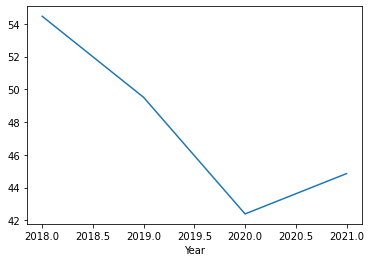

In [8]:
pfMean.plot(kind= 'line');

2. Draw the Area plot showing the average pollution Month wise

In [9]:
pf['Month']= pf['Timestamp'].dt.month
pf

,Timestamp,PM2.5,Year,Month
0,2018-01-01 00:00:00,90.19,2018,1
1,2018-01-01 01:00:00,86.98,2018,1
2,2018-01-01 02:00:00,86.06,2018,1
3,2018-01-01 03:00:00,94.04,2018,1
4,2018-01-01 04:00:00,108.78,2018,1
...,...,...,...,...
31856,2021-12-31 19:00:00,72.25,2021,12
31857,2021-12-31 20:00:00,71.56,2021,12
31858,2021-12-31 21:00:00,70.27,2021,12
31859,2021-12-31 22:00:00,66.78,2021,12


In [10]:
pfAvgMonth= pf.groupby('Month')['PM2.5'].mean()

<AxesSubplot:xlabel='Month'>

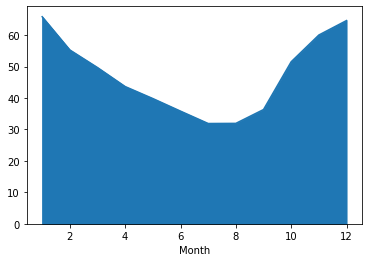

In [11]:
pfAvgMonth.plot(kind ='area')

3. Draw  a Bar Graph to show the Hours-wise average Pollution

* 0-12		     : Good
* 12.1 to 35.4 	 : Moderate
* 35.5 to 55.4	 : Unhealthy for Sensitive Groups
* 55.5 to150.4 	 : Unhealthy
* 150.5 to 250.4 : Very Unhealthy
* 250.5 to 500	 : Hazzardous

In [12]:
pf['Hour']= pf['Timestamp'].dt.hour
pf

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4
...,...,...,...,...,...
31856,2021-12-31 19:00:00,72.25,2021,12,19
31857,2021-12-31 20:00:00,71.56,2021,12,20
31858,2021-12-31 21:00:00,70.27,2021,12,21
31859,2021-12-31 22:00:00,66.78,2021,12,22


In [13]:
pfAveHour= pf.groupby('Hour')['PM2.5'].mean()


<AxesSubplot:xlabel='Hour'>

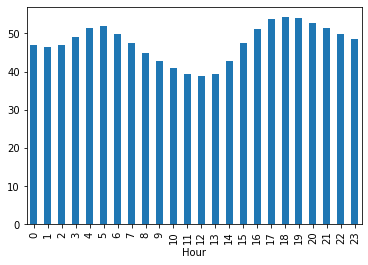

In [14]:
pfAveHour.plot(kind ='bar')

4. Usually in which month's , the air was recorded" Verry Unhealthy"

In [15]:
VeryUnhealthy=pf[(pf['PM2.5']>150.5) & (pf['PM2.5']<250.4)].groupby('Month')['PM2.5'].mean()

<AxesSubplot:xlabel='Month'>

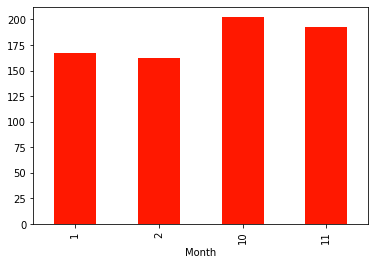

In [22]:
VeryUnhealthy.plot(kind = 'bar', color = '#FF1800')

5. Usually in which month's , the air was fresh (good)

In [20]:
Good=pf[pf['PM2.5']<12].groupby('Month')["PM2.5"].mean()
Good

Month
1    11.106667
4     8.636667
5    11.675000
6    11.246000
7     9.193333
8    11.057187
Name: PM2.5, dtype: float64

<AxesSubplot:xlabel='Month'>

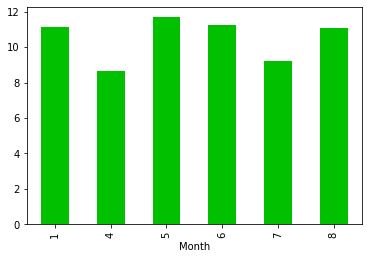

In [21]:
Good.plot(kind= 'bar', color = '#00C000')

6. In Year 2018 , how many times the AQI wsa recorded " MOderate"
* `12.1 to 35.4` : Moderate

In [26]:
moderate= (pf['PM2.5']>12.1) & (pf['PM2.5']<35.4)

In [29]:
pf[(pf['Year']==2018) & moderate].count()

Timestamp    2238
PM2.5        2238
Year         2238
Month        2238
Hour         2238
dtype: int64

7. How was the weather in the month of January and July

<AxesSubplot:xlabel='Month'>

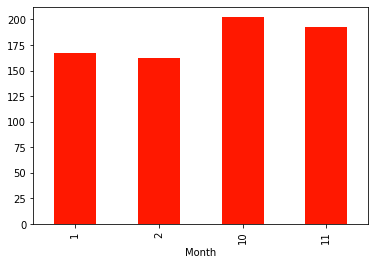

In [30]:
# In January, the weather very unhealthy
VeryUnhealthy.plot(kind = 'bar', color = '#FF1800')

<AxesSubplot:xlabel='Month'>

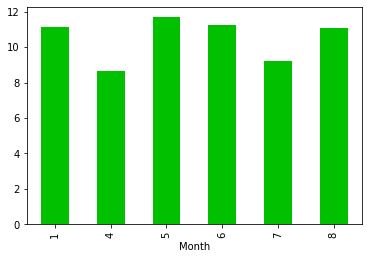

In [31]:
# In July, the weather very good
Good.plot(kind= 'bar', color = '#00C000')